In [54]:
# Add Important Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Read the dataset
df = pd.read_csv(r"C:\Users\harik\Downloads\sales_data_sample.csv", encoding='latin1')

In [24]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [26]:
# Check the shape
df.shape

(2823, 25)

In [28]:
# statistical summary of all numeric columns
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


# DATA PREPROCESSING

In [31]:
# Checking null values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [33]:
# After checking null values remove unwanted column
 # Reason for droping column
 # ADDRESSLINE2 - 90% of null values
 # PHONE - No use for sales analysis
 # CONTACTLASTNAME - Not relevant to sales KPI
 # CONTACTFIRSTNAME - Not relevant to sales KPI
 # ORDERLINENUMBER - This column represents the line number within a single order. Doesn't need for sales analysis
 # STATE - 47 % of null values , I have also city and country 
col_to_drop = ['ADDRESSLINE2', 'PHONE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'ORDERLINENUMBER','STATE']
df.drop(columns=col_to_drop,inplace=True)

In [35]:
# Handling null values using Mod
mod = df['POSTALCODE'].mode()[0]
df['POSTALCODE'] = df['POSTALCODE'].fillna(mod)
mod1 = df['TERRITORY'].mode()[0]
df['TERRITORY'] = df['TERRITORY'].fillna(mod1)

'28034'

In [45]:
df.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
ADDRESSLINE1       0
CITY               0
POSTALCODE         0
COUNTRY            0
TERRITORY          0
DEALSIZE           0
dtype: int64

In [14]:
# Checking duplicates
df.duplicated().sum()

0

In [15]:
# Checking data types
df.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
ADDRESSLINE1        object
CITY                object
POSTALCODE          object
COUNTRY             object
TERRITORY           object
DEALSIZE            object
dtype: object

In [47]:
# Changing data type of Orderdate
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [49]:
df.dtypes

ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
SALES                     float64
ORDERDATE          datetime64[ns]
STATUS                     object
QTR_ID                      int64
MONTH_ID                    int64
YEAR_ID                     int64
PRODUCTLINE                object
MSRP                        int64
PRODUCTCODE                object
CUSTOMERNAME               object
ADDRESSLINE1               object
CITY                       object
POSTALCODE                 object
COUNTRY                    object
TERRITORY                  object
DEALSIZE                   object
dtype: object

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   STATUS           2823 non-null   object        
 6   QTR_ID           2823 non-null   int64         
 7   MONTH_ID         2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  PRODUCTCODE      2823 non-null   object        
 12  CUSTOMERNAME     2823 non-null   object        
 13  ADDRESSLINE1     2823 non-null   object        
 14  CITY             2823 non-null   object 

# SALES ANALYSIS

In [64]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,10022,USA,EMEA,Small
1,10121,34,81.35,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,51100,France,EMEA,Small
2,10134,41,94.74,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,75508,France,EMEA,Medium
3,10145,45,83.26,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,90003,USA,EMEA,Medium
4,10159,49,100.00,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,28034,USA,EMEA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,28034,Spain,EMEA,Small
2819,10373,29,100.00,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,90110,Finland,EMEA,Medium
2820,10386,43,100.00,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,28034,Spain,EMEA,Medium
2821,10397,34,62.24,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,31000,France,EMEA,Small


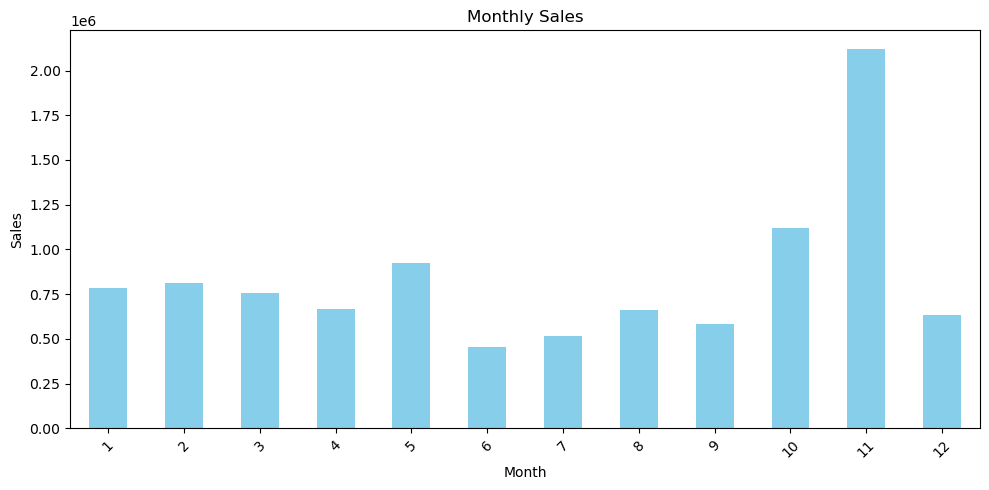

In [120]:
# Monthly Sales Trend
monthly_sales = df.groupby('MONTH_ID')['SALES'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar',color='skyblue')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

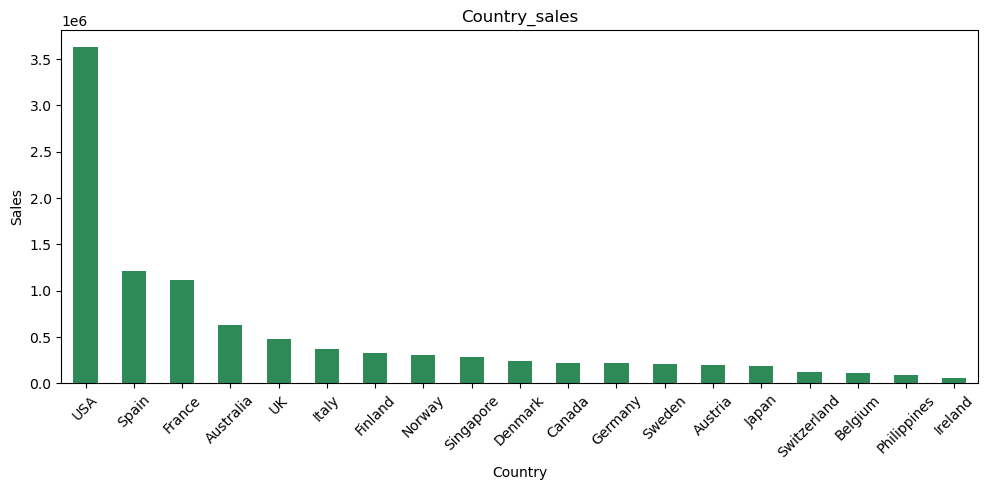

In [122]:
# Country Sales Trend
Country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
Country_sales.plot(kind='bar',color='seagreen')
plt.title('Country_sales')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

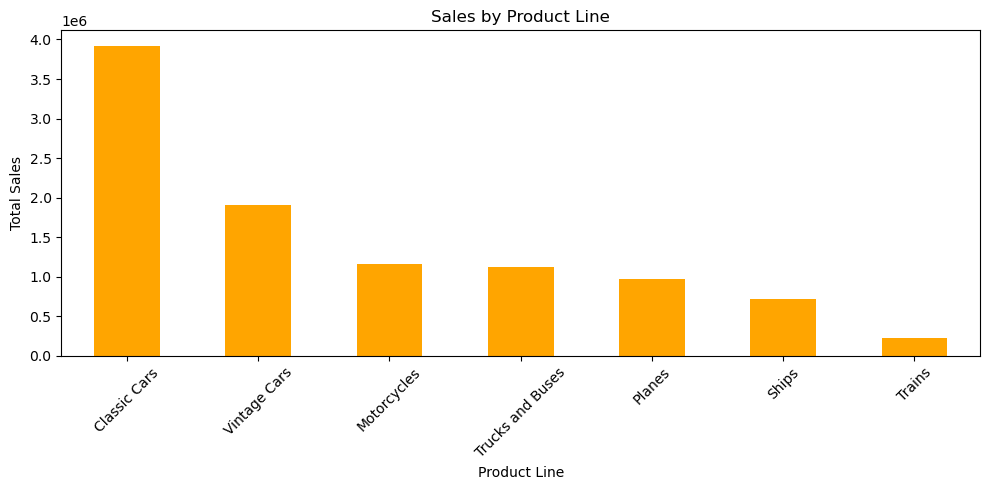

In [118]:
# Product line sales trend
productline_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
productline_sales.plot(kind='bar', color='orange')
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

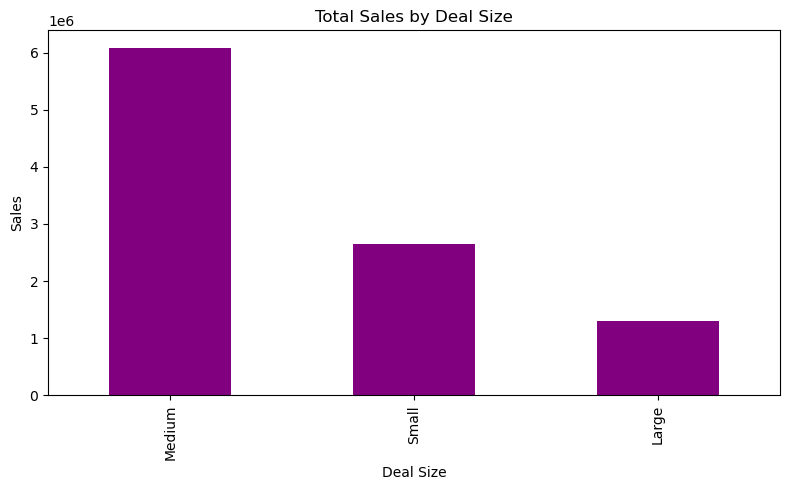

In [108]:
# Dealsize sales trend
dealsize_sales = df.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
dealsize_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

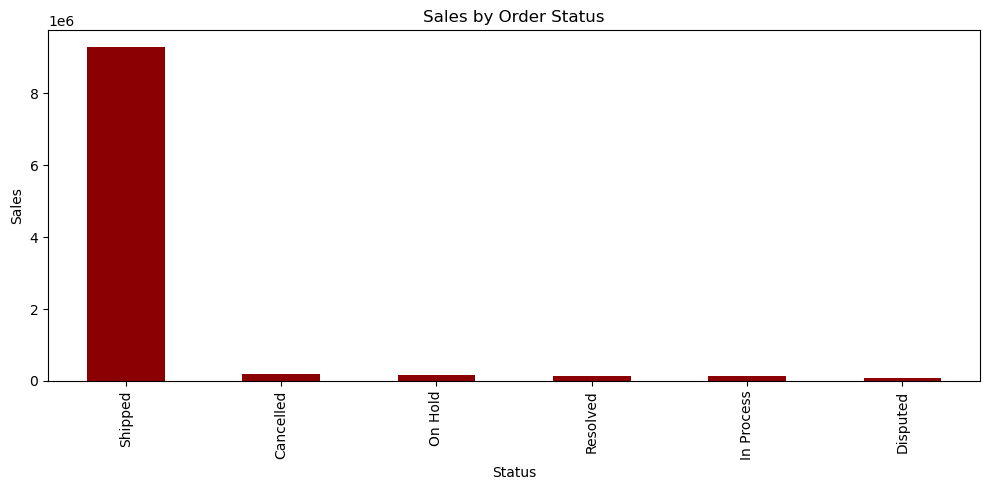

In [114]:
# status sales trend
status_sales = df.groupby('STATUS')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
status_sales.plot(kind='bar', color='darkred')
plt.title('Sales by Order Status')
plt.xlabel('Status')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

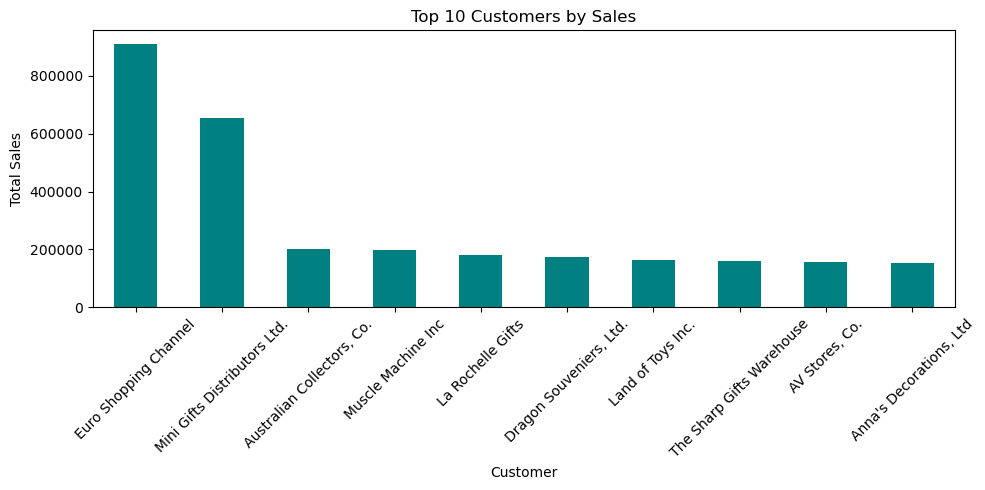

In [116]:
# Top customer sales trend
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_customers.plot(kind='bar', color='teal')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

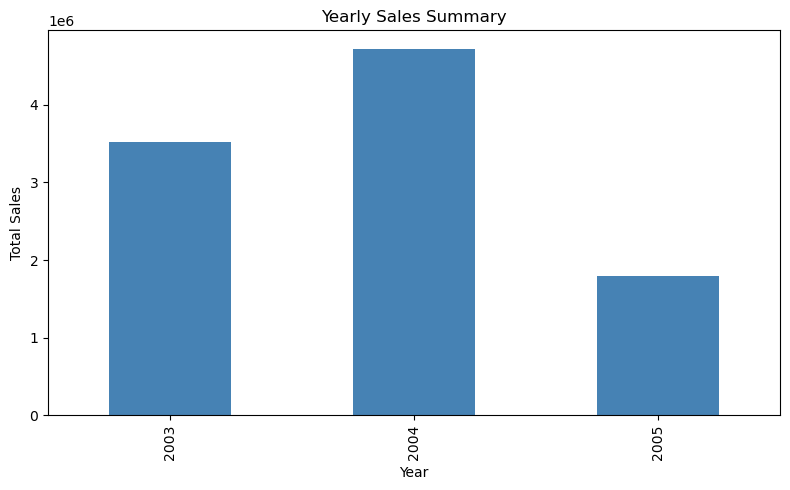

In [124]:
# Total sales by year trend
yearly_sales = df.groupby('YEAR_ID')['SALES'].sum()
plt.figure(figsize=(8, 5))
yearly_sales.plot(kind='bar', color='steelblue')
plt.title('Yearly Sales Summary')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [127]:
df.to_csv("cleaned_sales_data.csv", index=False)